In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [11]:
N = 200
r = np.linspace(0,1,N)
phi = np.linspace(0,2*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)
print(dr)

0.15915494309189535
0.005025125628140704


In [3]:
def h1(phi):
    
    if phi < np.pi:
        return 100.
    else:
        return 100.

In [4]:
def InitT():
    
    T = np.zeros((N,N))
    
    for i in range(len(phi)):
        T[-1,i] = h1(phi[i])
        
    return T

In [6]:
T = InitT()

In [7]:
T

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [ ]:
def Relajacion(T,Nit = int(1e5), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        

<IPython.core.display.Javascript object>


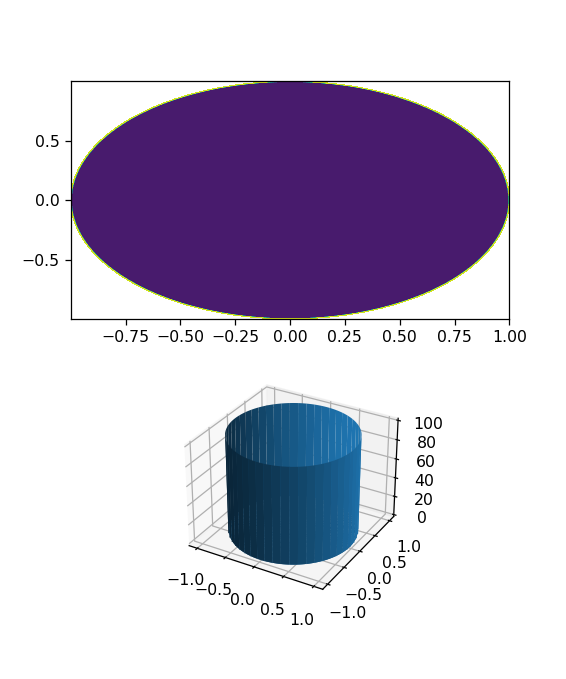

In [10]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212, projection='3d')

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,T.T)

ax1.plot_surface(X,Y,T.T)